Сравнение веб-страниц

Требуется определить какая из двух страниц с презентацией повышает количество продаж ("A" или "B"). Одна из потенциальных эрзац-переменной - время, которое посетители проводят на странице с презентацией. Разумно предположить, что презентация, которая задерживает внимание дольше, приведет к большему количеству продаж. Следовательно метрикой будет среднее время сеанса.

Observed difference: 21.40 sec
Views: Page A = 21; Page B = 15


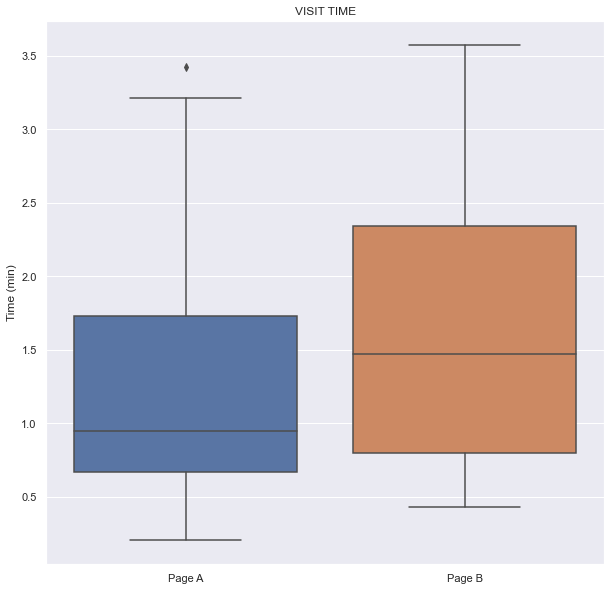

In [11]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

df = pd.read_csv('web_page_data.csv', sep=';')
columns = df.columns
columns = columns[2:]
df = df.drop(columns, axis=1)

A = df[df.Page == 'Page A'].Time
B = df[df.Page == 'Page B'].Time

nA = len(A)
nB = len(B)

mean_A = A.mean()
mean_B = B.mean()

obs_dif = abs(mean_A - mean_B)
print(f'Observed difference: {obs_dif*60:.2f} sec')
print(f'Views: Page A = {nA}; Page B = {nB}')

# Draw boxplot
plt.figure(figsize=(10,10))
plt.title('VISIT TIME')
sns.boxplot(x=df['Page'], y=df['Time'])
plt.xlabel('')
plt.ylabel('Time (min)')
plt.show()

Из проведенного анализа видно, что среднее время проведенное пользователями на странице "B" больше на 21.4 сек. Страницу "А" поситили 21 раз, а страницу "В" - 15 раз.
Теперь нужно проверить может ли быть полученнная разница пораждена случайностью? Один из способов проверить это - перестановочный тест.

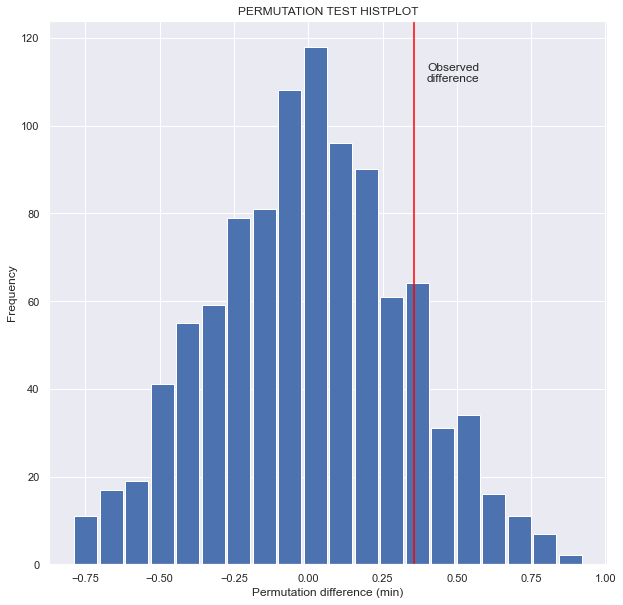

In [9]:
def per_fun(x, nA, nB):
    n = nA + nB
    idx_B = set(random.sample(range(n), nB))
    idx_A = set(range(n))-idx_B
    return x.loc[idx_A].mean() - x.loc[idx_B].mean()

R = 1000 # resamples count
permutation_diff = [per_fun(df['Time'], nA, nB) for _ in range(R)]

greater_results = np.mean(permutation_diff>(mean_B-mean_A))*100

# Draw histplot
plt.figure(figsize=(10, 10))
plt.title('PERMUTATION TEST HISTPLOT', )
plt.hist(permutation_diff, bins=20, rwidth=0.9)
plt.axvline(obs_dif, color='red')
plt.text(0.4, 110,'Observed\ndifference',)
plt.xlabel('Permutation difference (min)')
plt.ylabel('Frequency')
plt.show()


Из проведенного перестановочного теста видно, что средняя разница случайных перестановок часто превышает наблюдаемую разницу. Это происходит в 14.6% случаев. Это свидетельствует о том, что наблюдаемая разница между сеансами страниц "А" и "В" находится глубоко внутри диапазона случаной вариации и, следовательно, не является статистически значимой.